# Paid Social A/B Testing

## Summary
I have conducted A/B Testing to validate using simplified lead form improve online ad conversion rate. The improvement in the conversion rate had to be big enough to change the company's data capture policy and apply the change to over 30 variations of the landing page.

The null hypothesis was there is no difference between the landing page with the simplified lead form and the existing landing page. And the alternative hypothesis was there is a significant difference between two landing pages. The alpha level was set to 0.05, meaning the probability of the test is correctly reject null hypothesis is 95% but I would live with 5% of false positive.

I used Python's `statsmodels` library to calculate the sample size, performed two-way Z test (since the sample size is larger than 30). The test resulted 0.001 p-value. Therefore, I rejected null hypothesis and we went ahead and adopted new simplified lead form.


## Background
- Landing pages are essential elements on online ad campaigns (e.g., Google Search, paid social).
- The purpose of landing pages is to communicate the benefits of your products quickly (You got about 5 seconds!) and to capture the contact information about the prospective customers (leads).
- Online ads are considered "successful" only when the ad campaigns generate leads not just clicking the ads.
- There are many ways to improve the landing page performances but here are a few examples:
    - Optimize the form (The less field to fill out, the higher changes prospective customers complete the form. But it's a tradeoff of giving up important customer information.)
    - Optimize copy to convince the benefits and/or match the ad copy
    - Personalize the content on the landing page
    - Improve the page load speed


## Situation
Note: Numbers and some scenarios were altered to protect confidential information.
- Our marketing team has over 30 variations of landing page because we run over 1,000 online ads for different products and different audience.
- We recognized the lead form is a bit lengthy due to the company's data capture policy.
- However, the benefits of getting more qualified leads might surpass the company's data capture policy even though the sales team potentially have to fill out missing information manually, which is a cost too.
- Also, making changes to all different landing page costs developers' resources.
- So, we decided to perform A/B testing to evaluate the performance of a landing page with a simplified form against existing landing page with a long form.


### Current performance
- The current conversion rate from the landing page 10%
- 5% of leads become customers (5% lead conversion rate)
- The average customer lifetime value is 30,000 USD

Let's say, we get 1000 clicks from the online ads, we acquire 100 leads, and eventually 5 leads become customers, which generate 150,000 USD profits.

We're aiming to improve the landing page conversion rate by 10 points. The potential profit will be 300,000 USD, which is 150,000 USD more than what we are currently generating. After the discussion with stakeholders, additional 150,000 USD profit is reasonable to make the data capture policy. Also, we'll make the changes to all other landing page if the test is successful because the total potential profits generated from over 30 landing pages can easily pay the development cost.




## Technology
To perform A/B testing (Two sample Z/T test), the following functions from `statsmodels` were used.
- `proportion_effectsize`: Caluclate effect size for a test omparing two propertions. Or, effect size is calculated by taking the difference between two groups and dividing it by the standard devisation of one of the groups.
- `statsmodels.stats.power.NormalIndPower.solve_power`: Solve for any one parameter of the power of a two sample **z-test**. (effect size, sample size, alpha, power, and ratio) For this case example, the sample size was calculated using this function.
- `statsmodels.stats.power.tt_ind_solve_power`: Solve for any one parameter of the power of a two sample **t-test** Caluclate the sample size for two sample t-test.
- `proportions_ztest`, `proportion_confint` from `statsmodels.stats.proportion` module: calculate the p-value and confidence intervals for the z test.
- `ttest_ind` from `statsmodels.stats.weightstats` module: calculate the p-values for the t-test.


## Designing experiment

### Fomulate hypotheses
- Null hypothesis: There is no difference in lead conversion rate between the existing landing page (a long lead form) and the new landing page (a short lead form).
- Alternative hypothesis: There is a statistically significant difference between the new and old landing pages.

### Variable selection
- Dependent variable: user's conversion rate
- Independent variable: existing or new landing page (control and treatment)

### Methodology
- Use Facebook A/B test tool otherwise Facebook will optimize the campaign and we will not get the same ad performance for each ad.
    - Create a new campaign on Facebook and create two identical ads. 
    - One of ads has the current landing page as the ad landing page and another ad has the new landing page as the ad landing page. Other variables are same. (Copy, image, target audience, ad placement, etc.)


### Sample size
The number of sample size affect the test's statistical power (i.e. The probability that test can reject null hypothesis correctly)

- **Alpha value (critical value)**: The probability that we are willing to reject the null hpyothesis when it is actually the null hypothesis is correct. i.e. We're willing to live with the 5% of change that we conclude there is a difference even though it isn't. This is a **TYPE 1 ERRO** or **False Positive**
    - 1 - Confidence Level
    - Usually set to 0.05 or 5% (Convidende level of 95% and alpha of 5%)

- **Beta** : The probability that we failed to reject the null hypothesis when the alternative hypothesis is actually true. This is a **TYPE II Error** or **False negative**. 
    - Typically set to 0.2
 
- **Power**: The probability that test will correctly support the null hypothesis. (1 - β)

- **Effect size**: How big of a difference we expect there to be between conversion rates. Effect size is calculated by taking the difference between the two groups (e.g., the mean of treatment group minus the mean of the control group) and dividing it by the standard deviation of one of the groups – This will need to be agreed by various stakeholders. This this case, 5%.

```{note}
  - < 0.1 = Trivial effect
  - 0.1 - 0.3 = small effect
  - 0.3 - 0.5 moderate effect
  - > 0.5 large effect
 ```

## A/B testing python codes for a sample dataset

In [14]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

%matplotlib inline

### Calculate the sample size

In [15]:
#Calculate effect size based on expected rates
effect_size = sms.proportion_effectsize(0.20, 0.10)
effect_size

0.2837941092083278

In [16]:
#calculate samplesize n
required_n = sms.NormalIndPower().solve_power(effect_size, power = 0.8, alpha = 0.05, ratio = 1) #solve for any one parameter of the power of a two sample z-test
required_n = ceil(required_n)
print(f" We will need {required_n} observations for each group.")

 We will need 195 observations for each group.


## Prepare the data
I'm using the dammy data. This data set is avaialbe on Kaggle: https://www.kaggle.com/zhangluyuan/ab-testing?select=ab_data.csv

In [17]:
filename = "ab_data.csv"
df = pd.read_csv(filename)
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [19]:
pd.crosstab(df["group"], df["landing_page"])

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


In [20]:
#Remove the duplicate users

session_counts = df['user_id'].value_counts(ascending=False)
multi_users = session_counts[session_counts > 1].count()

print(f"Duplicates: {multi_users}")

multi_users = session_counts[session_counts > 1].count()
users_to_drop = session_counts[session_counts >1].index
df[~df["user_id"].isin(users_to_drop)]

Duplicates: 3894


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


## Sampling

In [21]:
control_sample = df[df["group"]=="control"].sample(n=required_n, random_state=22)
control_sample.head()

,user_id,timestamp,group,landing_page,converted
254532,644179,2017-01-16 04:15:36.663685,control,old_page,0
196706,729672,2017-01-20 19:04:10.409185,control,old_page,0
272726,866186,2017-01-09 02:56:47.675707,control,old_page,0
118044,884303,2017-01-18 04:49:04.225284,control,old_page,0
205159,882576,2017-01-15 13:36:49.854723,control,old_page,0


In [22]:
treatment_sample = df[df["group"]=="treatment"].sample(n=required_n, random_state=22)
treatment_sample.head()

,user_id,timestamp,group,landing_page,converted
155301,634761,2017-01-13 16:48:49.838750,treatment,new_page,0
175664,867837,2017-01-06 06:08:36.284810,treatment,new_page,0
286642,750518,2017-01-13 10:27:54.415101,treatment,new_page,0
230892,657043,2017-01-18 09:49:00.374240,treatment,new_page,0
96436,678762,2017-01-14 07:50:35.538789,treatment,new_page,0


In [23]:
ab_test = pd.concat([control_sample, treatment_sample], axis=0)

#Reset index
ab_test.reset_index(drop=True, inplace = True)

ab_test.head(10)

,user_id,timestamp,group,landing_page,converted
0,644179,2017-01-16 04:15:36.663685,control,old_page,0
1,729672,2017-01-20 19:04:10.409185,control,old_page,0
2,866186,2017-01-09 02:56:47.675707,control,old_page,0
3,884303,2017-01-18 04:49:04.225284,control,old_page,0
4,882576,2017-01-15 13:36:49.854723,control,old_page,0
5,922404,2017-01-04 16:28:51.385675,control,old_page,0
6,797435,2017-01-14 07:44:19.849593,control,old_page,0
7,806644,2017-01-10 17:43:00.799286,control,old_page,0
8,654993,2017-01-03 03:58:54.528626,control,old_page,0
9,929263,2017-01-13 15:33:37.297036,control,old_page,0


In [24]:
ab_test["group"].value_counts()

control      195
treatment    195
Name: group, dtype: int64

### Calculate conversion rate

In [25]:
conversion_rates = ab_test.groupby("group")["converted"]

#standard_deviation of the proposition
std_p = lambda x: np.std(x, ddof=0)

#standard_error of the population
se_p = lambda x: stats.sem(x, ddof=0)

In [26]:
conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ["Conversion_rate", "std_deviation", "standard error"]

In [27]:
conversion_rates.style.format('{:.3f}')

,Conversion_rate,std_deviation,standard error
group,,,
control,0.123,0.329,0.024
treatment,0.087,0.282,0.020


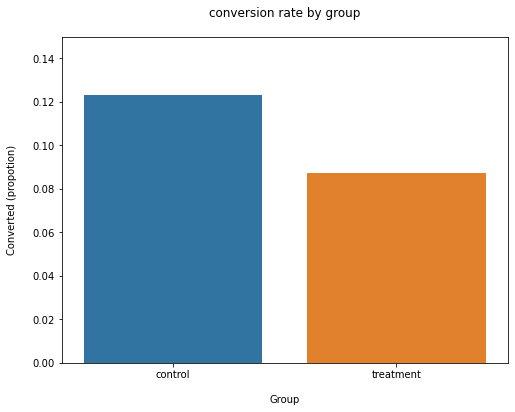

In [28]:
plt.figure(figsize = (8,6))
sns.barplot(x=ab_test["group"], y=ab_test["converted"], ci=False)

plt.ylim(0,0.15)
plt.title("conversion rate by group", pad = 20)
plt.xlabel("Group", labelpad=15)
plt.ylabel("Converted (propotion)", labelpad = 15);

## Test the hypothesis using two-sample Z-test/T-test

- Use Z-statistic when Sample size is >= 30 or 
    we know the variance of population (which is very are)
- Use T-statistic otherwise

In [32]:
control_results = ab_test[ab_test["group"]== "control"]["converted"]
treatment_results = ab_test[ab_test["group"]=="treatment"]["converted"]

### Z-test (sample size >= 30)

In [33]:
#z-test
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

n_con = control_results.count()
n_treat = treatment_results.count()

success = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

z_stat, p_val = proportions_ztest(success, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(success, nobs = nobs, alpha = 0.05)

print(f"z statistic: {z_stat:.2f}")
print(f"p-value: {p_val:.2f}")
print(f"ci 95% for contril group: [{lower_con:.3f}, {upper_con:.3f}]")
print(f"ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]")

z statistic: 1.16
p-value: 0.25
ci 95% for contril group: [0.077, 0.169]
ci 95% for treatment group: [0.048, 0.127]


### T-test (sample size < 30) 

In [34]:
from statsmodels.stats.weightstats import ttest_ind
t_stat, p_value, degree_of_freedom = ttest_ind(controll_results, treatment_results)
print(f"T-statistic: {t_stat:0.2f}")
print(f"p-value: {p_value:0.2f}")

T-statistic: 1.15
p-value: 0.25


## Results

In [35]:
if p_val < 0.05:
    print("Reject the null hypothesis.")
    
else:
    print("Failed to reject the null hypothesis.")

Failed to reject the null hypothesis.


Since the p-value is larger than the alpha level, we failed to reject the null hypothesis for this sample data set. Therefore, we will not move forward to implementing the changes to the landing page.

## References

- Dallanoce, F. (2021, August 22). ANOVA, T-test and other statistical tests with python. Medium. Retrieved March 21, 2022, from https://towardsdatascience.com/anova-t-test-and-other-statistical-tests-with-python-e7a36a2fdc0c 
- DiFrancesco, V. (2021, April 10). Understanding alpha, beta, and statistical power. Medium. Retrieved March 21, 2022, from https://towardsdatascience.com/understanding-alpha-beta-and-statistical-power-525b84453687 
- Ding, E. (2022, February 7). 7 A/B testing questions and answers in data science interviews. Medium. Retrieved March 21, 2022, from https://towardsdatascience.com/7-a-b-testing-questions-and-answers-in-data-science-interviews-eee6428a8b63#5072 
- Fillinich, R. (2021, August 23). AB testing with python. Medium. Retrieved March 21, 2022, from https://towardsdatascience.com/ab-testing-with-python-e5964dd66143 
- Hari, K. (2019, November 5). A/B testing clearly explained. Medium. Retrieved March 21, 2022, from https://medium.com/analytics-vidhya/a-b-testing-clearly-explained-56488430156 
- Hypothesis testing: Difference between Z-test and T-test. Analytics Vidhya. (2020, December 23). Retrieved March 21, 2022, from https://www.analyticsvidhya.com/blog/2020/06/statistics-analytics-hypothesis-testing-z-test-t-test/ 